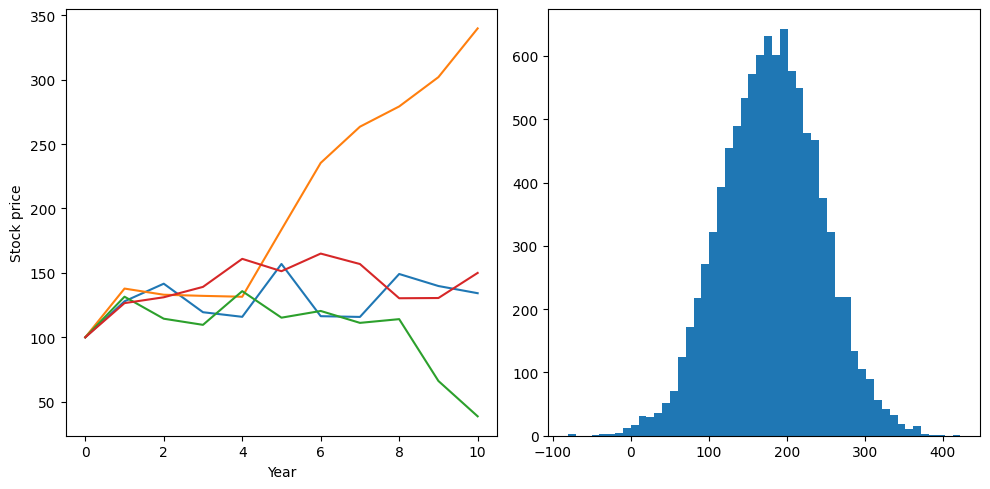

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
np.random.seed(123)

# Normal returns - not a realistic price representation

num_years = 10
num_sims = 10000
mean = 8
stdev = 20
 
z = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
P = np.zeros((num_sims, num_years+1))
P[:,0] = 100
 
for sim in range(num_sims):
    for year in range(1, num_years+1):
        P[sim, year] = P[sim, year-1] + z[sim, year]

# Create a figure
plt.figure(figsize=(10, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.plot(P[0:4,:].T)

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.hist(P[:,-1], bins=50)

# Show the plots
plt.tight_layout()
plt.show()

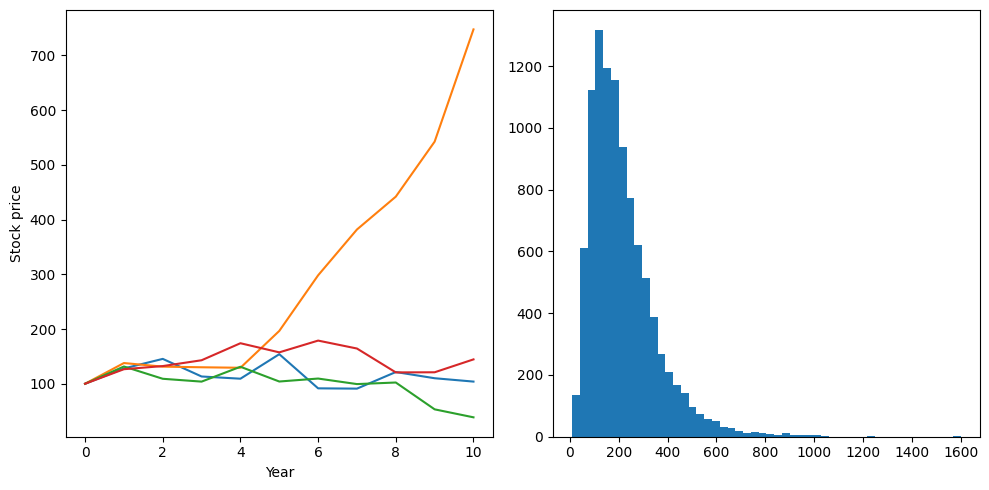

In [5]:
np.random.seed(123)

# Lognormal returns - a more realistic price representation

num_years = 10
num_sims = 10000
mean = 0.08
stdev = 0.20 
 
ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))
 
P = np.zeros((num_sims, num_years+1))
P[:,0] = 100
 
for sim in range(num_sims):
    for year in range(1, num_years+1):
        P[sim, year] = P[sim, year-1]* (1 + ret[sim, year])

plt.figure(figsize=(10, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.plot(P[0:4,:].T)

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.hist(P[:,-1], bins=50)
# plt.hist(P[:,-1], bins=50, range=(0,800)) # Crop at 800 to remove outliers
# Show the plots
plt.tight_layout()
plt.show()

In [7]:
import yfinance as yf
 
SP500 = yf.download('^GSPC', start='1971-12-31', end='2021-12-31')
SP500 = SP500.resample('YE').last()
SP500['ret'] = SP500['Close'].pct_change()
print('Arithmetic Average: ', SP500['ret'].mean())
print('Standard Deviation: ', SP500['ret'].std())
print('Geometric Average: ', (SP500['Close'].iloc[-1]/SP500['Close'].iloc[0])
       **(1/(len(SP500)-1))-1)
print('Geometric Average Approximation: ', SP500['ret'].mean()
       - 0.5 * (SP500['ret'].std())**2)

[*********************100%%**********************]  1 of 1 completed

Arithmetic Average:  0.09400122842963614
Standard Deviation:  0.16725932009600614
Geometric Average:  0.07995730407222146
Geometric Average Approximation:  0.08001338835014701


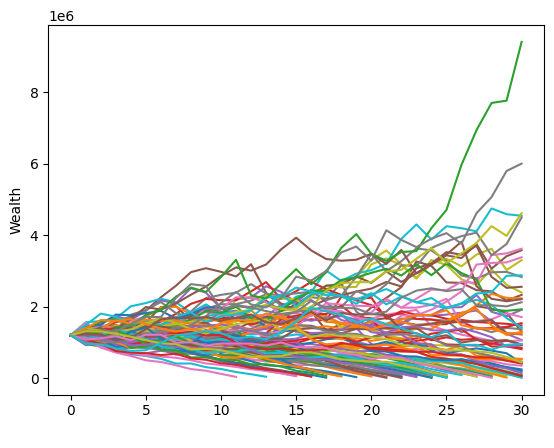

In [9]:
# Simulating probability of running out of money in retirement.

np.random.seed(123)
num_years = 30
num_sims = 10000
mean = 0.06
stdev = 0.12
spending_0 = 60000
W0 = 1200000

inflation = 0.02

ret = np.random.normal(loc=mean, scale=stdev, size=(num_sims, num_years+1))

W = np.empty(shape=[num_sims, num_years+1])
W[:,:] = np.NaN
W[:,0] = W0

count_bankrupt = 0

for sim in range(num_sims):
    spending = spending_0
    for year in range(1, num_years+1):
        # Check whether you run out of money
        next_period_wealth = (W[sim, year-1] - spending) * (1 + ret[sim, year])
        if next_period_wealth < 0:
            count_bankrupt += 1
            break
        else:
            W[sim, year] = next_period_wealth
        spending = spending * (1 + inflation)

plt.xlabel('Year')
plt.ylabel('Wealth')
plt.plot(W[0:10,:].T);